#Importing libraries

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool
from google.colab import files
import networkx as nx 





uploading the data

In [15]:
uploaded = files.upload()

Saving cl27_RM.csv to cl27_RM.csv


reading and cleaning data

In [17]:
data = pd.read_csv('cl27_RM.csv')
del data["Unnamed: 0"]
del data["Index"]
#data

#deleting first character(P) of the residues' names
res_list = []

for c in data["Residue"]:
  res_list.append(c[1::])

#print(res_list)
data["Residue"] = res_list
data






,Residue,Degree,Betweenness-centrality,Closeness-centrality
0,THR9,4,0.000000,0.199740
1,GLY10,5,0.001056,0.196551
2,ARG11,5,0.000856,0.203635
3,LEU12,8,0.004053,0.223105
4,MET13,6,0.003311,0.218087
...,...,...,...,...
455,ALA464,7,0.000105,0.192306
456,SER465,4,0.000000,0.185100
457,GLY466,6,0.002559,0.204569
458,PHE467,9,0.007782,0.219188


#Selecting top 10 residues with highest degree values

In [18]:

data_Degree = data[["Residue","Degree"]]
data_top_10_highDegree = data_Degree.nlargest(10,["Degree"])
data_top_10_highDegree



,Residue,Degree
117,ARG126,26
223,ARG232,19
284,TYR293,19
200,GLU209,18
144,ARG153,17
32,GLU41,16
123,TYR132,16
203,ARG212,16
371,GLU380,16
391,ARG400,16


#creating a panda dataframe for all sites

Creating array for all sites

In [9]:
array1 = ['ARG93', 'ASN94','ARG223','ARG218','GLU209']
array2 = ["ARG334","ARG333","ARG330","GLU454","THR455"]
array3 = ["PARG153","ARG400","LYS256","MET142","ARG92","GLN88","GLU146","ARG212","LYS213","TYR143"]
array4 = ["SER248","ASN217","ARG253","ILE216"]
array5 = ["GLU209","ARG223","LYS230","ARG11"]

In [53]:
site1 = data.loc[data["Residue"].isin(array1)]
site1

,Residue,Degree,Betweenness-centrality,Closeness-centrality
84,ARG93,13,0.042479,0.249438
85,ASN94,9,0.001674,0.227553
200,GLU209,18,0.029540,0.244679
209,ARG218,8,0.003444,0.208225
214,ARG223,11,0.009048,0.210607


In [10]:
site2 = data.loc[data["Residue"].isin(array2)]
site2

,Residue,Degree,Betweenness-centrality,Closeness-centrality
321,ARG330,7,0.001237,0.221283
324,ARG333,15,0.062220,0.258297
325,ARG334,14,0.037370,0.235785
445,GLU454,5,0.003615,0.203604
446,THR455,8,0.000419,0.216248


In [80]:
site3 = data.loc[data["Residue"].isin(array3)]
site3

,Residue,Degree,Betweenness-centrality,Closeness-centrality
83,ARG92,10,0.047940,0.275306
133,MET142,11,0.019684,0.274287
134,TYR143,10,0.011226,0.258578
137,GLU146,15,0.063523,0.275213
203,ARG212,19,0.035876,0.256500
247,LYS256,4,0.012872,0.233594
391,ARG400,17,0.093301,0.287525


In [77]:
site4 = data.loc[data["Residue"].isin(array4)]
site4

,Residue,Degree,Betweenness-centrality,Closeness-centrality
207,ILE216,12,0.002198,0.234435
208,ASN217,9,0.010855,0.235384
239,SER248,10,0.001313,0.220705
244,ARG253,10,0.003044,0.247332


In [72]:
site5 = data.loc[data["Residue"].isin(array5)]
site5

,Residue,Degree,Betweenness-centrality,Closeness-centrality
2,ARG11,9,0.009323,0.215805
200,GLU209,16,0.029417,0.268099
214,ARG223,14,0.007649,0.220605
221,LYS230,9,0.003425,0.202394


#Printing the top 10 residues with the highest BC

In [ ]:
#selecting the top 10 highest values in columb BC

data_BC = data[["Residue","Betweenness-centrality"]]
data_BC
data_top_10_highBC = data_BC.nlargest(10,["Betweenness-centrality"])
data_top_10_highBC



,Residue,Betweenness-centrality
117,PARG126,0.119769
137,PGLU146,0.101769
144,PARG153,0.099352
391,PARG400,0.090209
384,PGLU393,0.087517
324,PARG333,0.080933
371,PGLU380,0.071667
406,PASN415,0.066596
238,PGLU247,0.057463
403,PTRP412,0.055256


#Printing the top 10 residues with the highest CC

In [ ]:
data_CC = data[["Residue","Closeness-centrality"]]
data_top_10_highCC = data_CC.nlargest(10,["Closeness-centrality"])
data_top_10_highCC

,Residue,Closeness-centrality
17,PPHE26,0.297294
117,PARG126,0.295473
403,PTRP412,0.292356
379,PTRP388,0.289926
402,PASN411,0.289594
270,PGLN279,0.288314
124,PCYS133,0.285869
371,PGLU380,0.285724
155,PILE164,0.285691
273,PGLN282,0.285069


A function that return the top n residues with highest BC and CC values

In [11]:
#selecting the top 10 highest values in both column BC and CC
def top_n_highest_BC_AND_CC(data,n):
  top10_BC_AND_CC  = data.nlargest(n,["Betweenness-centrality","Closeness-centrality"])
  return top10_BC_AND_CC




In [12]:
top10_BC_CC = top_n_highest_BC_AND_CC(data, 10)
top10_BC_CC

,Residue,Degree,Betweenness-centrality,Closeness-centrality
144,ARG153,22,0.121595,0.282104
137,GLU146,15,0.093901,0.283940
391,ARG400,16,0.080439,0.283458
117,ARG126,22,0.077765,0.272221
384,GLU393,11,0.073427,0.260677
371,GLU380,15,0.070345,0.268920
324,ARG333,15,0.062220,0.258297
403,TRP412,18,0.061402,0.283014
291,LYS300,10,0.056445,0.242428
83,ARG92,11,0.051079,0.268639


#Barplot of selected data

In [13]:
def plot_bar(data, graph_tile, image_title):
  data.reset_index().plot(x = "Residue",y = ["Betweenness-centrality","Closeness-centrality"],kind = "bar", figsize = (15, 10), rot = 0).get_figure()
  font = {'family' : 'normal','weight' : 'bold','size' : 14}
  plt.rc('font', **font)
  plt.title(graph_tile)
  plt.ylabel("values")
  plt.savefig(image_title)






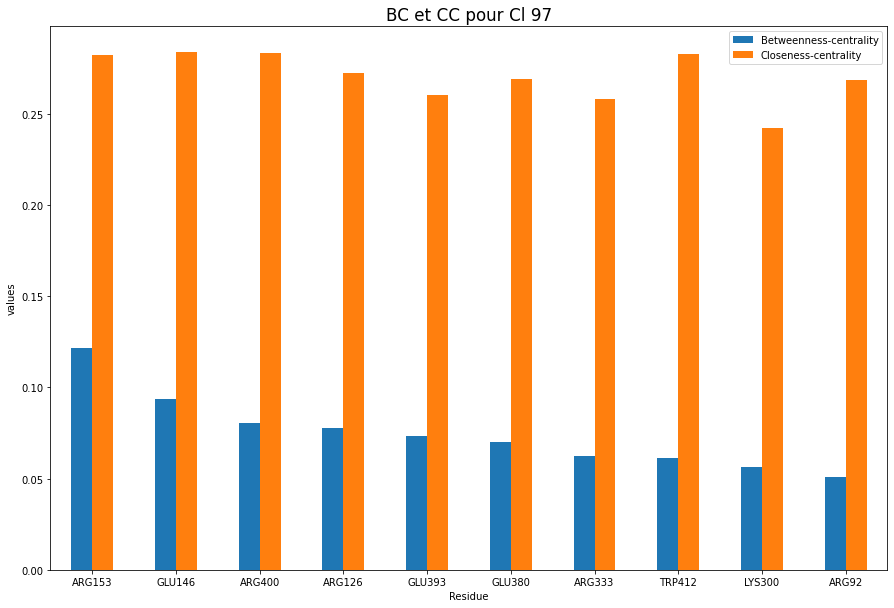

In [14]:
plot_bar(top10_BC_CC,"BC et CC pour Cl 97","cl97.png")

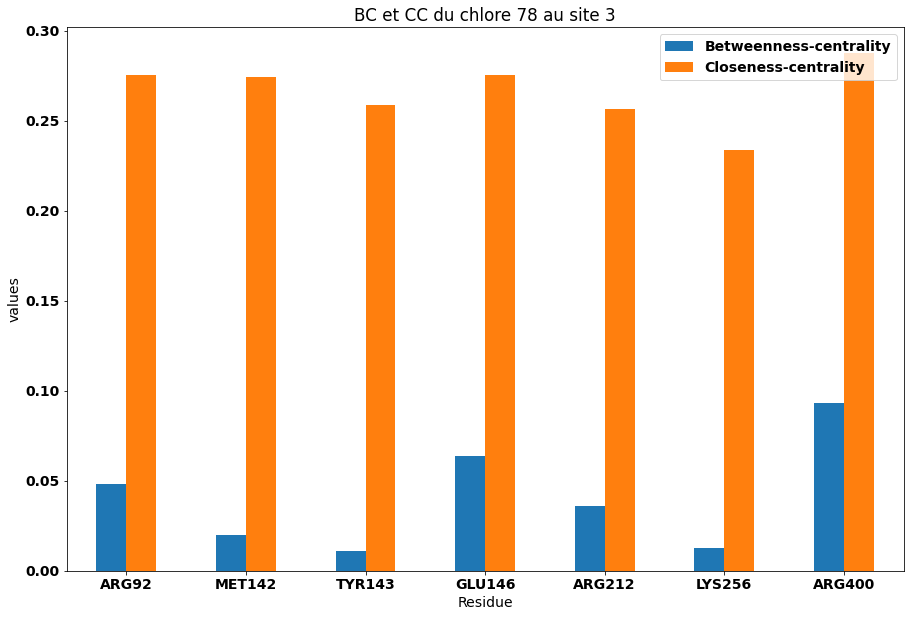

In [81]:
plot_bar(site3,"BC et CC du chlore 78 au site 3","site3_cl78.png")

#Visualizing the networks

In [ ]:
data_Graph = nx.from_pandas_edgelist(top10_BC_CC ,"Betweenness-centrality","Residue" )
nx.draw(data_Graph)